In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pylab as plt
# https://docs.scipy.org/doc/numpy/reference/routines.math.html
import numpy as np

In [4]:
from distutils.version import StrictVersion

In [5]:
import sklearn

assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

sklearn.__version__

'0.18.2'

In [6]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

assert StrictVersion(tf.__version__) >= StrictVersion('1.1.0')

tf.__version__

'1.2.1'

In [7]:
import keras

assert StrictVersion(keras.__version__) >= StrictVersion('2.0.0')

keras.__version__

Using TensorFlow backend.


'2.0.4'

In [8]:
# !curl -O https://raw.githubusercontent.com/DJCordhose/speed-limit-signs/master/data/speed-limit-signs.zip
# !curl -O https://raw.githubusercontent.com/DJCordhose/speed-limit-signs/master/data/augmented-signs.zip    

In [9]:
# https://docs.python.org/3/library/zipfile.html
# from zipfile import ZipFile
# zip = ZipFile(r'speed-limit-signs.zip')
# zip.extractall('.')
# zip = ZipFile(r'augmented-signs.zip')
# zip.extractall('.')

In [10]:
!ls -l speed-limit-signs

total 35012
drwxrwxrwx 0 root root 512 Jul  4 08:44 0
drwxrwxrwx 0 root root 512 Jul  4 08:44 1
drwxrwxrwx 0 root root 512 Jul  4 08:44 2
drwxrwxrwx 0 root root 512 Jul  4 08:44 3
drwxrwxrwx 0 root root 512 Jul  4 08:44 4
drwxrwxrwx 0 root root 512 Jul  4 08:44 5
-rwxrwxrwx 1 root root 380 Jul  4 08:44 README.md


In [11]:
!ls -l augmented-signs

total 458755
drwxrwxrwx 0 root root 512 Jul  4 08:46 0
drwxrwxrwx 0 root root 512 Jul  4 08:46 1
drwxrwxrwx 0 root root 512 Jul  4 08:46 2
drwxrwxrwx 0 root root 512 Jul  4 08:46 3
drwxrwxrwx 0 root root 512 Jul  4 08:46 4
drwxrwxrwx 0 root root 512 Jul  4 08:46 5


In [13]:
import os
import skimage.data

def load_data(data_dir, type=".ppm"):
    """Loads a data set and returns two lists:
    
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith(type)]
        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

In [14]:
# Load datasets.
ROOT_PATH = "./"
# data_dir = os.path.join(ROOT_PATH, "speed-limit-signs")
# images, labels = load_data(data_dir, type=".ppm")

data_dir = os.path.join(ROOT_PATH, "augmented-signs")
images, labels = load_data(data_dir, type=".png")

In [15]:
import matplotlib
import matplotlib.pyplot as plt

def display_images_and_labels(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

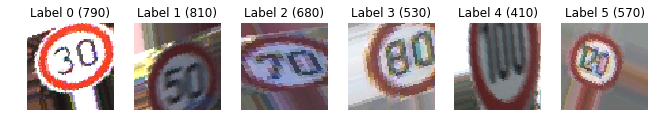

In [16]:
display_images_and_labels(images, labels)

In [17]:
for image in images[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (64, 64, 3), min: 0, max: 255
shape: (64, 64, 3), min: 0, max: 255
shape: (64, 64, 3), min: 0, max: 255
shape: (64, 64, 3), min: 0, max: 255
shape: (64, 64, 3), min: 0, max: 255


In [18]:
import skimage.transform

# Resize images
images64 = [skimage.transform.resize(image, (64, 64))
                for image in images]

In [19]:
for image in images64[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (64, 64, 3), min: 0.0, max: 1.0
shape: (64, 64, 3), min: 1.323559997984492e-15, max: 1.0
shape: (64, 64, 3), min: 0.0, max: 1.0
shape: (64, 64, 3), min: 2.953628627081201e-15, max: 1.0
shape: (64, 64, 3), min: 2.2152214703109006e-15, max: 1.0


In [20]:
import numpy as np

y = np.array(labels)
X = np.array(images64)
y.shape, X.shape

((3790,), (3790, 64, 64, 3))

In [21]:
from keras.utils.np_utils import to_categorical

num_categories = 6

y = to_categorical(y, num_categories)

## Zuerst testen wir unser Modell, ob wir es überhaupt trainiert bekommen, indem wir auf einer kleinen Menge von Daten overfitten

In [22]:
from sklearn.model_selection import train_test_split

In [105]:
# http://cs231n.github.io/neural-networks-3/#sanitycheck
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=42)

In [106]:
X_train.shape, y_train.shape

((37, 64, 64, 3), (37, 6))

In [107]:
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Convolution2D, MaxPooling2D

# input tensor for a 3-channel 64x64 image
inputs = Input(shape=(64, 64, 3))

# one block of convolutional layers

# 32 filters with a 3x3 kernel, outputs 64x64x32 tensor
x = Convolution2D(32, 3, 3, activation='relu')(inputs)
x = Convolution2D(32, 3, 3, activation='relu')(x)
x = Convolution2D(32, 3, 3, activation='relu')(x)

# max pooling with 2x2 window, reducing data to a fourth, reduces risk of overfitting
x = MaxPooling2D(pool_size=(2, 2))(x)

# drops 50% of all nodes at training (but not for test/prediction), also reduces risk of overfitting
# x = Dropout(0.5)(x)
# http://cs231n.github.io/neural-networks-2/#reg

# one more block
x = Convolution2D(64, 3, 3, activation='relu')(x)
x = Convolution2D(64, 3, 3, activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Dropout(0.5)(x)

# one more block
x = Convolution2D(128, 3, 3, activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Dropout(0.5)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
# x = Dropout(0.50)(x)

# softmax activation, 6 categories
predictions = Dense(6, activation='softmax')(x)
model = Model(input=inputs, output=predictions)
model.summary()
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [111]:
!rm -rf ../tmp/tf_log
!rm -rf ../tmp/model-checkpoints

!mkdir ../tmp/model-checkpoints
!mkdir ../tmp/tf_log

In [112]:
checkpoint_callback = keras.callbacks.ModelCheckpoint('../tmp/model-checkpoints/weights.epoch-{epoch:02d}-val_loss-{val_loss:.2f}.hdf5');

In [113]:
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [114]:
# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/tensorboard/README.md
# https://keras.io/callbacks/#tensorboard
# http://stackoverflow.com/questions/42112260/how-do-i-use-the-tensorboard-callback-of-keras
tb_callback = keras.callbacks.TensorBoard(log_dir='../tmp/tf_log')
#                                          histogram_freq=1, write_graph=True, write_images=True)
#                                          histogram_freq=1, write_graph=True, write_images=True)
# tbCallBack = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)
# To start tensorboard
# tensorboard --logdir=/mnt/c/Users/olive/Development/ml/tf_log
# open http://localhost:6006

In [115]:
# model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.3)
model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.3, 
#           callbacks=[tb_callback, checkpoint_callback, early_stopping_callback])
          callbacks=[tb_callback]) 
# model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.3, callbacks=[checkpointCallback])

Train on 25 samples, validate on 12 samples
Epoch 1/50
25/25 [==============================] - 2s - loss: 5.5456 - acc: 0.2800 - val_loss: 1.7867 - val_acc: 0.1667
Epoch 2/50
25/25 [==============================] - 2s - loss: 1.7988 - acc: 0.2000 - val_loss: 1.7906 - val_acc: 0.0833
Epoch 3/50
25/25 [==============================] - 2s - loss: 1.7911 - acc: 0.1200 - val_loss: 1.8030 - val_acc: 0.1667
Epoch 4/50
25/25 [==============================] - 2s - loss: 1.7593 - acc: 0.2000 - val_loss: 1.7897 - val_acc: 0.4167
Epoch 5/50
25/25 [==============================] - 2s - loss: 1.7709 - acc: 0.3200 - val_loss: 2.8932 - val_acc: 0.0833
Epoch 6/50
25/25 [==============================] - 2s - loss: 1.8209 - acc: 0.2000 - val_loss: 1.7847 - val_acc: 0.0833
Epoch 7/50
25/25 [==============================] - 2s - loss: 1.8550 - acc: 0.2800 - val_loss: 1.7936 - val_acc: 0.0833
Epoch 8/50
25/25 [==============================] - 2s - loss: 1.7728 - acc: 0.2400 - val_loss: 1.7755 - val_

## Now same model, but with Dropouts

In [167]:
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Convolution2D, MaxPooling2D

drop_out = 0.5
# drop_out = 0.25
# drop_out = 0.0

# input tensor for a 3-channel 64x64 image
inputs = Input(shape=(64, 64, 3))

# one block of convolutional layers
x = Convolution2D(32, 3, 3, activation='relu')(inputs)
x = Convolution2D(32, 3, 3, activation='relu')(x)
x = Convolution2D(32, 3, 3, activation='relu')(x)

# max pooling with 2x2 window, reducing data to a fourth, reduces risk of overfitting
x = MaxPooling2D(pool_size=(2, 2))(x)

# drops 25% / 50% of all nodes at training (but not for test/prediction), also reduces risk of overfitting
x = Dropout(drop_out)(x)
# http://cs231n.github.io/neural-networks-2/#reg

# one more block
x = Convolution2D(64, 3, 3, activation='relu')(x)
x = Convolution2D(64, 3, 3, activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(drop_out)(x)

# one more block
x = Convolution2D(128, 3, 3, activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(drop_out)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(drop_out)(x)

# softmax activation, 6 categories
predictions = Dense(6, activation='softmax')(x)
model = Model(input=inputs, output=predictions)
model.summary()
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 60, 60, 32)        9248      
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 58, 58, 32)        9248      
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 27, 27, 64)        18496     
__________

In [148]:
!rm -rf ../tmp/tf_log
!rm -rf ../tmp/model-checkpoints

!mkdir ../tmp/model-checkpoints
!mkdir ../tmp/tf_log

In [134]:
# model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.3)
model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.3, 
#           callbacks=[tb_callback, checkpoint_callback, early_stopping_callback])
          callbacks=[tb_callback]) 
# model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.3, callbacks=[checkpointCallback])

Train on 25 samples, validate on 12 samples
Epoch 1/50
25/25 [==============================] - 2s - loss: 4.9244 - acc: 0.0800 - val_loss: 1.7926 - val_acc: 0.0833
Epoch 2/50
25/25 [==============================] - 2s - loss: 1.7915 - acc: 0.1600 - val_loss: 1.7912 - val_acc: 0.0833
Epoch 3/50
25/25 [==============================] - 2s - loss: 1.7890 - acc: 0.2000 - val_loss: 1.7900 - val_acc: 0.0833
Epoch 4/50
25/25 [==============================] - 2s - loss: 1.7866 - acc: 0.2400 - val_loss: 1.7888 - val_acc: 0.0833
Epoch 5/50
25/25 [==============================] - 2s - loss: 1.7905 - acc: 0.2000 - val_loss: 1.7875 - val_acc: 0.0833
Epoch 6/50
25/25 [==============================] - 2s - loss: 2.1429 - acc: 0.2800 - val_loss: 1.7788 - val_acc: 0.4167
Epoch 7/50
25/25 [==============================] - 2s - loss: 1.7794 - acc: 0.2000 - val_loss: 1.7801 - val_acc: 0.4167
Epoch 8/50
25/25 [==============================] - 2s - loss: 1.7579 - acc: 0.2000 - val_loss: 1.7800 - val_

## With Dropout, it typically refuses to overfit easily

## Let us try it with a lot of data, refusing to overfit acutually is a feature, not a bug

In [168]:
# training on a smaller subset due to lack of processing power, need to try on more powerful machine with all data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=3)
# We can use all our data for training, because we have a completely separate set for testing later
# X_train = X
# y_train = y

In [169]:
X_train.shape, y_train.shape

((379, 64, 64, 3), (379, 6))

In [170]:
model = Model(input=inputs, output=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [171]:
from datetime import tzinfo, timedelta, datetime

In [174]:
!rm -rf ../tmp/tf_log
!rm -rf ../tmp/model-checkpoints

!mkdir ../tmp/model-checkpoints
!mkdir ../tmp/tf_log

In [175]:
print(datetime.utcnow().isoformat())
model.fit(X_train, y_train, epochs=150, batch_size=100, validation_split=0.3, 
#           callbacks=[tb_callback, early_stopping_callback])
          callbacks=[tb_callback])
# model.fit(X_train, y_train, epochs=50, batch_size=200, validation_split=0.3)
print(datetime.utcnow().isoformat())

2017-07-09T18:55:57.385610
Train on 265 samples, validate on 114 samples
Epoch 1/150
265/265 [==============================] - 12s - loss: 1.7882 - acc: 0.1962 - val_loss: 1.7867 - val_acc: 0.1667
Epoch 2/150
265/265 [==============================] - 12s - loss: 1.7766 - acc: 0.2000 - val_loss: 1.7782 - val_acc: 0.1667
Epoch 3/150
265/265 [==============================] - 11s - loss: 1.7648 - acc: 0.1962 - val_loss: 1.7773 - val_acc: 0.1667
Epoch 4/150
265/265 [==============================] - 12s - loss: 1.7783 - acc: 0.1887 - val_loss: 1.7739 - val_acc: 0.1667
Epoch 5/150
265/265 [==============================] - 11s - loss: 1.7912 - acc: 0.2038 - val_loss: 1.7802 - val_acc: 0.1667
Epoch 6/150
265/265 [==============================] - 11s - loss: 1.7601 - acc: 0.2264 - val_loss: 1.7737 - val_acc: 0.1667
Epoch 7/150
265/265 [==============================] - 12s - loss: 1.7523 - acc: 0.2302 - val_loss: 1.7778 - val_acc: 0.2544
Epoch 8/150
265/265 [==============================]

265/265 [==============================] - 13s - loss: 0.2881 - acc: 0.9019 - val_loss: 2.6480 - val_acc: 0.2632
Epoch 130/150
265/265 [==============================] - 12s - loss: 0.2763 - acc: 0.9057 - val_loss: 2.9795 - val_acc: 0.2456
Epoch 131/150
265/265 [==============================] - 12s - loss: 0.3952 - acc: 0.8679 - val_loss: 2.9460 - val_acc: 0.2368
Epoch 132/150
265/265 [==============================] - 14s - loss: 0.7404 - acc: 0.7396 - val_loss: 2.5271 - val_acc: 0.2544
Epoch 133/150
265/265 [==============================] - 14s - loss: 0.3928 - acc: 0.8302 - val_loss: 2.7515 - val_acc: 0.2544
Epoch 134/150
265/265 [==============================] - 15s - loss: 0.3483 - acc: 0.8830 - val_loss: 3.4418 - val_acc: 0.2544
Epoch 135/150
265/265 [==============================] - 13s - loss: 0.2272 - acc: 0.9283 - val_loss: 3.4934 - val_acc: 0.2456
Epoch 136/150
265/265 [==============================] - 13s - loss: 0.2964 - acc: 0.8981 - val_loss: 3.3314 - val_acc: 0.254

### It really tries not to overfit, but in general we do not have enough training data

In [165]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, batch_size=32)
train_loss, train_accuracy

379/379 [==============================] - 5s     


(1.1381789043270503, 0.7941952497946555)

In [166]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
test_loss, test_accuracy

3411/3411 [==============================] - 47s    


(3.5652635606353633, 0.29698035768384773)

In [ ]:
!mkdir models

In [ ]:
model.save('models/conv-vgg-augmented.hdf5')

In [ ]:
!ls -l models